In [1]:
%load_ext autoreload

In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
#from monetio.models import hysplit

In [3]:
from monetio.models import hysplit

/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


In [4]:
from utilvolc import volcat
import utilvolc.ash_inverse as ai
from utilvolc import ashapp

In [5]:
from utilvolc.ashapp import ashinverse

In [31]:

projdir = os.getcwd().replace('notebooks','')

vloc = [160.587,55.978]
tag ='B'
#ens = ['gep{:02d}'.format(x) for x in np.arange(1,31)]
#ens.append('gec00')
#ens=['gep04','gep03']

#----------------------------------------------------------------
# locations and names of netcdf files with cdump output.
tdir = os.path.join(projdir,'data')
fnamelist  = ['xrfile.invbezy{}.nc'.format(tag)]
tdirlist = [tdir]

#----------------------------------------------------------------
configdir = os.path.join(projdir,'RunB')
configfile = 'config.invbezy{}.txt'.format(tag)

#-----------------------------------------------------------------
# location of volcat files
vdir = os.path.join(projdir,'data','volcat')
# volcano id to locate
vid = 'v300250'
#-----------------------------------------------------------------
# Location of inverse algorithm output
#wpath = os.getcwd()
wdir = os.path.join(projdir,'RunB')
#print(wpath)
#cdir = '../Run{}/'.format(tag)
#wdir = '../Run{}/'.format(tag,tag)
#sdir = os.path.join(wdir,'RunM_1_2_3_4_TF')
name = 'out.dat'
name2 = 'out2.dat'
#------------------------------------------------------------------

# name to write emit-times file to.
emit_file_name = '{}emit_Run{}4.txt'.format(wdir,tag)
tcm_name_base = 'run{}zzz.tcm.txt'.format(tag)
figbase = 'Run{}4'.format(tag)

#-------------------------------------------------------------------
#

execdir = os.path.join(projdir,'Inverse_240')
hysplitdir = os.path.join(projdir,'hysplit')
#execdir = mdir+'/Inverse_'
print(execdir, hysplitdir)
print(vdir)
#

datadir = os.path.join(projdir, 'data')

/hysplit-users/alicec/projects/bezy/Inverse_240 /hysplit-users/alicec/projects/bezy/hysplit
/hysplit-users/alicec/projects/bezy/data/volcat


In [15]:
%autoreload
#time list to prepare.
# start with one hour after eruption. 21:00-22:00
dlist = []
sdate = datetime.datetime(2020,10,21,21,0)
#sdate = datetime.datetime(2020,10,22,12,0)
dt = datetime.timedelta(hours=1)
for iii in np.arange(0,10):
    drange = [sdate, sdate+dt]
    dlist.append(drange)
    sdate += dt
print(dlist[0])
print(dlist[-1])

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [66]:
# initiate the InverseAshEns object
%autoreload
inverse = ai.InverseAshEns(tdirlist,fnamelist,vdir,vid,configdir=configdir,configfile=configfile,verbose=False)

In [67]:
%autoreload
inverse.set_directory(wdir,execdir,datadir,hysplitdir)
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunB
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunB
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [68]:
inva = inverse.invlist[0]
inva.cdump.coords

Coordinates:
  * time       (time) datetime64[ns] 2020-10-21T19:00:00 ... 2020-10-22T11:00:00
  * z          (z) int64 1523 3047 4571 6095 7619 9143 10667 12191 13715 15239
  * y          (y) int64 376 377 378 379 380 381 382 ... 480 481 482 483 484 485
  * x          (x) int64 866 867 868 869 870 871 872 ... 947 948 949 950 951 952
  * ens        (ens) object '102119_2880' '102119_3880' ... '102200_12880'
    source     <U13 'Line to 14 km'
    latitude   (y, x) float64 ...
    longitude  (y, x) float64 ...

In [69]:
# add in the relavant VOLCAT observations
%autoreload
#dlist = [[datetime.datetime(2020,10,22,9),datetime.datetime(2020,10,22,10)]]
for drange in dlist:
    print(drange)
    inverse.prepare_one_time(drange)

[datetime.datetime(2020, 10, 21, 21, 0), datetime.datetime(2020, 10, 21, 22, 0)]
[datetime.datetime(2020, 10, 21, 22, 0), datetime.datetime(2020, 10, 21, 23, 0)]
[datetime.datetime(2020, 10, 21, 23, 0), datetime.datetime(2020, 10, 22, 0, 0)]
[datetime.datetime(2020, 10, 22, 0, 0), datetime.datetime(2020, 10, 22, 1, 0)]
[datetime.datetime(2020, 10, 22, 1, 0), datetime.datetime(2020, 10, 22, 2, 0)]
[datetime.datetime(2020, 10, 22, 2, 0), datetime.datetime(2020, 10, 22, 3, 0)]
[datetime.datetime(2020, 10, 22, 3, 0), datetime.datetime(2020, 10, 22, 4, 0)]
[datetime.datetime(2020, 10, 22, 4, 0), datetime.datetime(2020, 10, 22, 5, 0)]
[datetime.datetime(2020, 10, 22, 5, 0), datetime.datetime(2020, 10, 22, 6, 0)]
[datetime.datetime(2020, 10, 22, 6, 0), datetime.datetime(2020, 10, 22, 7, 0)]


In [71]:
inverse.invlist[0].inp

{'HYSPLIT_DIR': '../',
 'MAP_DIR': '/hysplit-users/alicec/hysplit.v5.0.0/graphics/',
 'WORK_DIR': '/hysplit-users/alicec/tmp/',
 'CONVERT_EXE': 'convert',
 'PYTHON_EXE': '/hysplit-users/alicec/anaconda3/envs/hysplit/bin/python',
 'forecastDirectory': '/pub/forecast',
 'archivesDirectory': '/pub/archives',
 'GHOSTSCRIPT_EXE': 'gs',
 'DATA_DIR': '/hysplit-users/alicec/utilhysplit/utilvolc/ashapp/',
 'owner': 'A. Person',
 'VolcanoName': 'Bezymianny',
 'area': 785000.0,
 'top': 12880.0,
 'bottom': 2880.0,
 'start_date': datetime.datetime(2020, 10, 21, 19, 0),
 'durationOfSimulation': 12.0,
 'testminutes': 0.0,
 'emissionHours': 6.0,
 'meteorologicalData': 'GFS0p25',
 'EruptionSize': 0.0,
 'latitude': 55.978,
 'longitude': 160.587,
 'samplingIntervalHours': 1.0,
 'eflag': 0.0,
 'source_type': 'uniform',
 'jobname': 'ashtest',
 'runflag': 'inverse',
 'gisOption': 3,
 'zoomFactor': 50,
 'generatingPostscript': True,
 'generatingPDF': True,
 'mapBackground': 'arlmap',
 'mapProjection': 0,
 's

In [72]:
%autoreload
inverse.invlist[0].print_summary()

Observations availalbe in volcat_avg_hash
dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
times in cdump file
2020 10 21 19:00z
2020 10 21 20:00z
2020 10 21 21:00z
2020 10 21 22:00z
2020 10 21 23:00z
2020 10 22 00:00z
2020 10 22 01:00z
2020 10 22 02:00z
2020 10 22 03:00z
2020 10 22 04:00z
2020 10 22 05:00z
2020 10 22 06:00z
2020 10 22 07:00z
2020 10 22 08:00z
2020 10 22 09:00z
2020 10 22 10:00z
2020 10 22 11:00z


2 bezyB
tii 2
<xarray.DataArray 'time' ()>
array('2020-10-21T21:00:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2020-10-21T21:00:00
    source   <U13 'Line to 14 km'


/hysplit-users/alicec/anaconda3/envs/paris/lib/python3.8/site-packages/xarray/core/computation.py:739: RuntimeWarning: divide by zero encountered in log10
  result_data = func(*input_data)


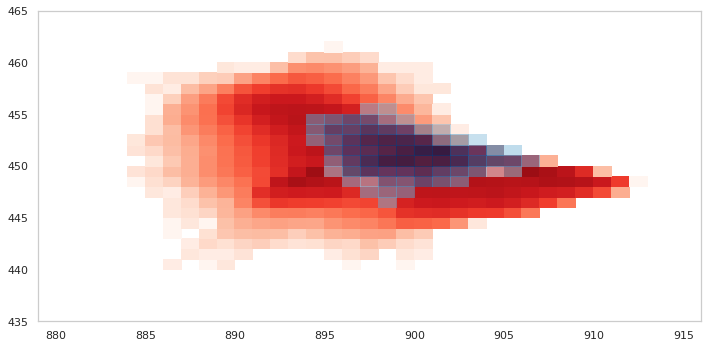

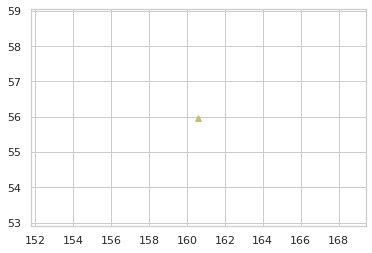

In [73]:
#gep10, gep16 looks good at tii=6.
#gep24 possibly looks ok.
zlevel=None  #index of vertical level to show.
           # if None then sum along the z index.
%autoreload
inverse.compare_plotsA(daterange=dlist[0],tii=2,zii=zlevel,vloc=None)
plt.plot(160.587,55.978,'y^')


In [74]:
%autoreload
inverse.set_concmult(1)

In [75]:
%autoreload
tii = [2,3,4]  #times to assimilate in inversion algorithm.
remove_cols=True
remove_rows=False
remove_sources = None
#remove_sources = ['12880']  # this would remove top vertical level from consideration.
#inverse.make_tcm_mult([1,2,3,4],remove_cols=True,remove_rows=False,remove_sources=['12880'])
inverse.make_tcm_mult(tii,remove_cols=remove_cols, remove_rows=remove_rows, remove_sources=remove_sources)
runtag = ai.create_runtag(tag,tii,remove_cols, remove_rows, remove_sources)

# set the subdirectory for this TCM run.
#subdir = inverse.set_sub_directory(runtag)
#print('setting subdirectory {}'.format(subdir))

2020-10-21T21:00:00.000000000
2020-10-21T22:00:00.000000000
2020-10-21T23:00:00.000000000


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:758: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.lonlist = np.array(lonlist)
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:759: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if remove_cols:
/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:773: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'd

In [76]:
print(runtag)

RunB_2_3_4_TF


/hysplit-users/alicec/utilhysplit/utilvolc/ash_inverse.py:875: RuntimeWarning: divide by zero encountered in log10
  plt.colorbar(cb)


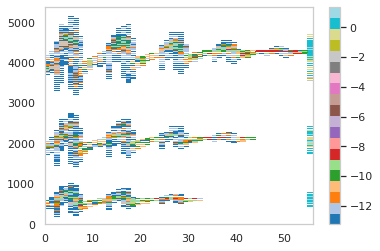

True

In [77]:
%autoreload
inverse.plot_tcm()



In [101]:
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.set_subdirectory(runtag)

'/hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TF'

In [79]:
%autoreload
tcmstr = inverse.write_tcm(os.path.join(inverse.subdir, tcm_name_base.replace('zzz','4')))
#print(tcmstr)

(5381, 56)
N_ctrl 55
output file /hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TF/runB4.tcm_bezyB.txt


In [80]:
%autoreload
#hysplitdir = '/hysplit-users/alicec/FBamcArea/exec/'
#inverse.set_directory(wdir,execdir,hysplitdir)
inverse.run_tcm()

bezyB


In [81]:
# Now run the inverse model.

# open the Parameters_in.dat file and set N_ctrl, Nx_ctrl and lbfgs_nbd to
# the number shown for N_ctrl above.

# copy the tcm file to TCM_sum.csv

# run new_lbfgsb.x

bezyB


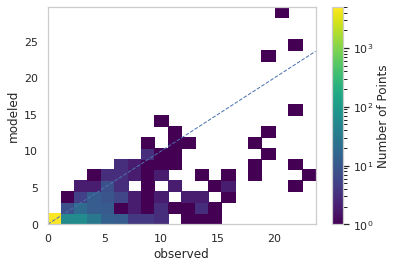

In [82]:
%autoreload
inverse.plot_outdat(eii=None)

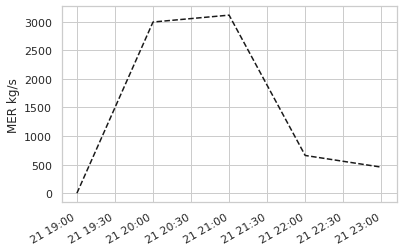

In [83]:
%autoreload
eii=[13,14,15]
eii=None
unit='g/h'
unit='kg/s'
inverse.plot_outdat_ts(eii,unit=unit)
#ax = plt.gca()
#ax.set_ylim(0,10000)

In [84]:
#%autoreload
#inverse.sourcehash = ai.get_sourcehash(configdir,configfile)

bezyB


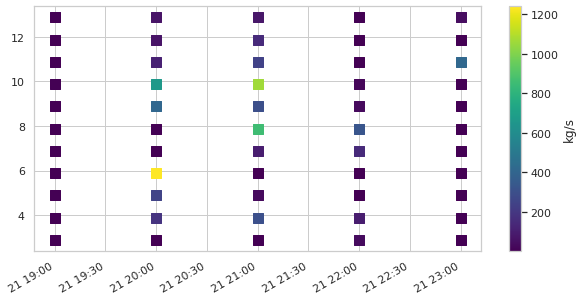

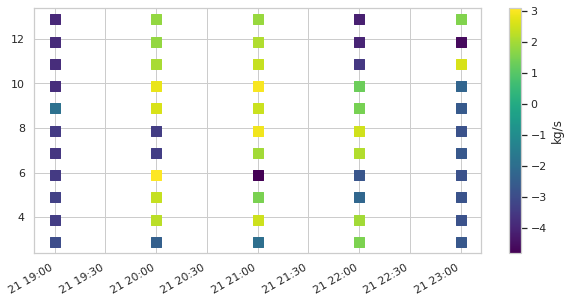

In [85]:
%autoreload
unit='kg/s'
#unit='g/h'
iii=0
print(inverse.taglist[iii])
ilist =  inverse.read_outdat()
df = ilist[iii].get_emis()
vals = inverse.invlist[iii].make_outdat(df)
inverse.invlist[iii].plot_outdat(vals,log=False,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions_log.png'.format(figbase))
plt.show()
inverse.invlist[0].plot_outdat(vals,log=True,cmap='viridis',unit=unit)
#plt.savefig('{}.emissions.png'.format(figbase))


In [46]:
inverse.invlist[0].inp

{'HYSPLIT_DIR': '/hysplit-users/alicec/FBamcArea/',
 'MAP_DIR': '/hysplit-users/alicec/hysplit.v5.0.0/graphics/',
 'WORK_DIR': '/hysplit-users/alicec/tmp/',
 'CONVERT_EXE': 'convert',
 'PYTHON_EXE': '/hysplit-users/alicec/anaconda3/envs/hysplit/bin/python',
 'forecastDirectory': '/pub/forecast',
 'archivesDirectory': '/pub/archives',
 'GHOSTSCRIPT_EXE': 'gs',
 'DATA_DIR': '/hysplit-users/alicec/utilhysplit/utilvolc/ashapp/',
 'owner': 'A. Person',
 'VolcanoName': 'Bezymianny',
 'area': 785000.0,
 'top': 12880.0,
 'bottom': 2880.0,
 'start_date': datetime.datetime(2020, 10, 21, 19, 0),
 'durationOfSimulation': 12.0,
 'testminutes': 0.0,
 'emissionHours': 6.0,
 'meteorologicalData': 'GFS0p25',
 'EruptionSize': 0.0,
 'latitude': 55.978,
 'longitude': 160.587,
 'samplingIntervalHours': 1.0,
 'eflag': 0.0,
 'source_type': 'uniform',
 'jobname': 'ashtest',
 'runflag': 'inverse',
 'gisOption': 3,
 'zoomFactor': 50,
 'generatingPostscript': True,
 'generatingPDF': True,
 'mapBackground': 'arlm

In [56]:
%autoreload
inverse.print_directories()

Working directory, wdir :/hysplit-users/alicec/projects/bezy/RunB
execdir :/hysplit-users/alicec/projects/bezy/Inverse_240
hysplitdir :/hysplit-users/alicec/projects/bezy/hysplit
subdir :/hysplit-users/alicec/projects/bezy/RunB
vdir :/hysplit-users/alicec/projects/bezy/data/volcat
datadir :/hysplit-users/alicec/projects/bezy/data


In [94]:
%autoreload
# creates emit-times, CONTROL and SETUP files for HYSPLIT runs.
inverse.make_efile(vloc=vloc)

No meteorological files found /hysplit-users/alicec/projects/bezy/data/%Y%m%d/hysplit.t%Hz.gfs0p25f


{'HYSPLIT_DIR': '../', 'MAP_DIR': '/hysplit-users/alicec/hysplit.v5.0.0/graphics/', 'WORK_DIR': '/hysplit-users/alicec/tmp/', 'CONVERT_EXE': 'convert', 'PYTHON_EXE': '/hysplit-users/alicec/anaconda3/envs/hysplit/bin/python', 'forecastDirectory': '/hysplit-users/alicec/projects/bezy/data/', 'archivesDirectory': '/hysplit-users/alicec/projects/bezy/data/gfs0p25', 'GHOSTSCRIPT_EXE': 'gs', 'DATA_DIR': '/hysplit-users/alicec/utilhysplit/utilvolc/ashapp/', 'owner': 'A. Person', 'VolcanoName': 'Bezymianny', 'area': 785000.0, 'top': 12880.0, 'bottom': 2880.0, 'start_date': datetime.datetime(2020, 10, 21, 19, 0), 'durationOfSimulation': 12.0, 'testminutes': 0.0, 'emissionHours': 6.0, 'meteorologicalData': 'GFS0p25', 'EruptionSize': 0.0, 'latitude': 55.978, 'longitude': 160.587, 'samplingIntervalHours': 1.0, 'eflag': 0.0, 'source_type': 'uniform', 'jobname': 'ashtest', 'runflag': 'inverse', 'gisOption': 3, 'zoomFactor': 50, 'generatingPostscript': True, 'generatingPDF': True, 'mapBackground': 'a

In [103]:
%autoreload
inverse.run_hysplit()

running  /hysplit-users/alicec/projects/bezy/hysplit/exec/hycs_std bezyB
in loop 0s procs 1
in loop 30s procs 1
in loop 60s procs 1
in loop 90s procs 1
in loop 120s procs 1
in loop 150s procs 1
in loop 180s procs 1
in loop 210s procs 1
in loop 240s procs 1
in loop 270s procs 1
in loop 300s procs 1
in loop 330s procs 1
in loop 360s procs 1
in loop 390s procs 1
in loop 420s procs 1
in loop 450s procs 1
in loop 480s procs 1
in loop 510s procs 1
in loop 540s procs 1
in loop 570s procs 1
in loop 600s procs 1
in loop 630s procs 1
in loop 660s procs 1
in loop 690s procs 0


In [99]:
inverse.subdir

'/hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TF'

In [102]:
%autoreload
#inverse.subdir = inverse.wdir
dset = inverse.create_emit_output('Run{}4.nc'.format(tag))

DSET is NONE
WARNING Cannot open 
/hysplit-users/alicec/projects/bezy/RunB/RunB_2_3_4_TF/cdump.bezyB
None
None


UnboundLocalError: local variable 'mlat' referenced before assignment

In [42]:
dset

<xarray.DataArray 'p060' (source: 1, ens: 31, time: 36, z: 10, y: 232, x: 550)>
array([[[[[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 

In [119]:
for attr in dset.attrs: print(type(dset.attrs[attr]), attr)

<class 'list'> Species ID
<class 'float'> sample time hours
<class 'list'> Starting Locations
<class 'str'> Source Date
<class 'str'> Meteorological Model ID
<class 'numpy.int32'> Number Start Locations
<class 'numpy.int32'> Number of Levels
<class 'numpy.ndarray'> Level top heights (m)
<class 'numpy.int32'> Number of Species
<class 'datetime.timedelta'> Sampling Time
<class 'str'> time description
<class 'dict'> Concentration Grid
<class 'str'> Coordinate time description
<class 'list'> sources
<class 'str'> Method
<class 'str'> units
<class 'str'> MetData


In [154]:
%autoreload
from utilvolc import basic_checks
dset3 = ai.update_attrs_for_netcdf(dset)

In [156]:
dset

<xarray.DataArray 'p060' (source: 1, ens: 31, time: 36, z: 10, y: 232, x: 550)>
array([[[[[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          ...,

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]]],


         [[[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           ...,
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.]],

          [[0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 0., ..., 0., 0., 0.],
           [0., 0., 

In [151]:
dset2.to_netcdf('test.nc')